In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
# from scipy import stats

In [22]:
data_file="Shelter_years.csv"
data_file_df = pd.read_csv(data_file)
data_file_df.reset_index(drop=True).head()


,0,Shelter Name,Year_OpStart,Beds,Unnamed: 4,1967,1968,1969,1970,1971,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,1,The Sanctuary,1983.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,2,Hamilton Families |Shelter,2001.0,150.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,3,Hospitality House Shelter,1967.0,25.0,NaN,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,4,La Casa de las Madres,1976.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,5,Navigation Center,2015.0,939.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [23]:
filter_df = data_file_df.replace(np.nan,0).set_index('Shelter Name').filter(["2011","2012","2013","2014","2015","2016","2017","2018","2019","2020","2021"])
filter_df   

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Shelter Name,,,,,,,,,,,
The Sanctuary,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Hamilton Families |Shelter,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Hospitality House Shelter,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
La Casa de las Madres,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Navigation Center,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Division Circle Navigation Center,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
A Woman's Place,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Hope Center,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Next Door Shelter,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [24]:
filter_df.sum()

2011    11.0
2012    11.0
2013    11.0
2014    11.0
2015    12.0
2016    12.0
2017    12.0
2018    14.0
2019    14.0
2020    14.0
2021    14.0
dtype: float64

Text(0, 0.5, 'Number of Shelters')

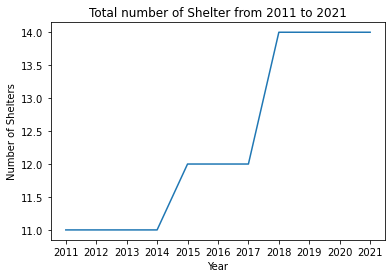

In [25]:
plt.plot(filter_df.sum())
plt.title('Total number of Shelter from 2011 to 2021')
plt.xlabel('Year')
plt.ylabel('Number of Shelters')

In [26]:
clean_df = pd.read_csv('homeless.csv')
clean_df.rename({"Unnamed: 0": "Type"},axis=1, inplace=True)
clean_df

,Type,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,CoC Number,CA-501,CA-501,CA-501,CA-501,CA-501,CA-501,CA-501,CA-501,CA-501,CA-501,CA-501
1,CoC Name,San Francisco CoC,San Francisco CoC,San Francisco CoC,San Francisco CoC,San Francisco CoC,San Francisco CoC,San Francisco CoC,San Francisco CoC,San Francisco CoC,San Francisco CoC,San Francisco CoC
2,Overall Homeless,5669.0,5895.0,7008.0,6408.0,6775.0,6996.0,6858.0,6857.0,8035.0,8124.0,4000
3,Sheltered ES Homeless,1677.0,1757.0,1919.0,1522.0,1981.0,2197.0,2056.0,2011.0,2412.0,2471.0,3588.0
4,Sheltered TH Homeless,595.0,742.0,720.0,517.0,420.0,425.0,434.0,474.0,425.0,473.0,412.0
...,...,...,...,...,...,...,...,...,...,...,...,...
600,Sheltered TH Homeless Parenting Youth Under,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
601,Sheltered Total Homeless Parenting Youth Under,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
602,Unsheltered Homeless Parenting Youth Under,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
603,CoC Category,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Major City CoC


In [27]:
overall_homeless =clean_df.iloc[2]
overall_homeless

Type    Overall Homeless
2011              5669.0
2012              5895.0
2013              7008.0
2014              6408.0
2015              6775.0
2016              6996.0
2017              6858.0
2018              6857.0
2019              8035.0
2020              8124.0
2021                4000
Name: 2, dtype: object

In [28]:
oah = pd.to_numeric(overall_homeless[1:], downcast='float')

print(oah)

2011    5669.0
2012    5895.0
2013    7008.0
2014    6408.0
2015    6775.0
2016    6996.0
2017    6858.0
2018    6857.0
2019    8035.0
2020    8124.0
2021    4000.0
Name: 2, dtype: float32


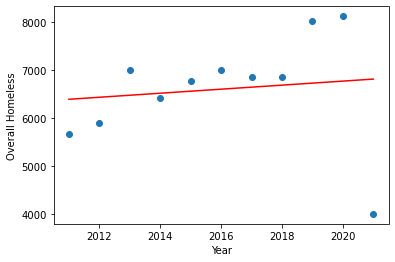

In [46]:
# Perform a linear regression on year versus overall homeless

sf_homeless = oah
shelters = oah.index.astype('int')

(slope, intercept, rvalue, pvalue, stderr) = linregress(shelters, sf_homeless)
regress_values = shelters * slope + intercept


plt.scatter(shelters,sf_homeless)
plt.plot(shelters,regress_values,"r-")
plt.xlabel("Year")
plt.ylabel("Overall Homeless")
plt.show()


In [ ]:
combine = pd.concat([filter_df.sum(), oah], axis=1).T.reset_index(drop=True).drop('Type',1)
combine.T[1] = pd.to_numeric(combine.T[1])

/var/folders/0y/llrshh0d7fdb11813rr9n_pm0000gn/T/ipykernel_2121/3367918690.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  combine = pd.concat([filter_df.sum(), oah], axis=1).T.reset_index(drop=True).drop('Type',1)


KeyError: "['Type'] not found in axis"

     2011    2012    2013    2014    2015    2016    2017    2018    2019  \
0    11.0    11.0    11.0    11.0    12.0    12.0    12.0    14.0    14.0   
1  5669.0  5895.0  7008.0  6408.0  6775.0  6996.0  6858.0  6857.0  8035.0   

     2020  2021  
0    14.0  14.0  
1  8124.0  4000  


TypeError: arg must be a list, tuple, 1-d array, or Series

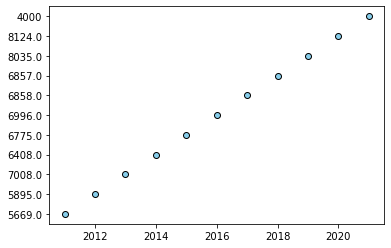

In [ ]:
plt.scatter(combine.columns.astype('int'), combine.iloc[1], marker = "o", facecolors = "skyblue", edgecolors = "black")